In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def plot_returns(env_name, ents, clips, std_scale=0.1):
    with open(f"{env_name}.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"{env_name}_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(ents), len(clips))
    print(returns.shape)
    
    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"clip={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)

        plt.figure(figsize=(10, 7))
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        ax.yaxis.set_major_locator(plticker.MultipleLocator(base=25.0))
        plt.title(f"Ent. bonus={ents[j]}")
        plt.show()
    
    return returns

(8, 4, 6, 16)


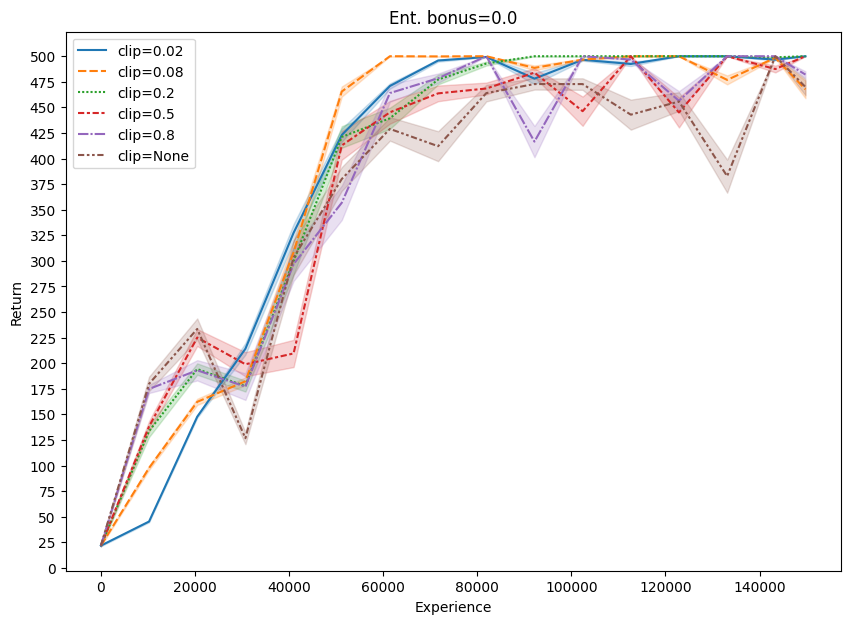

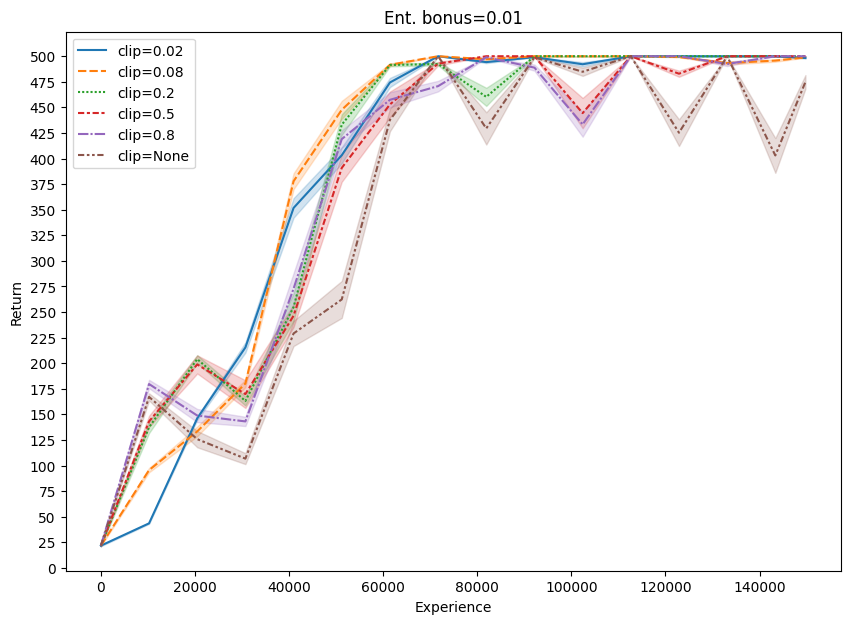

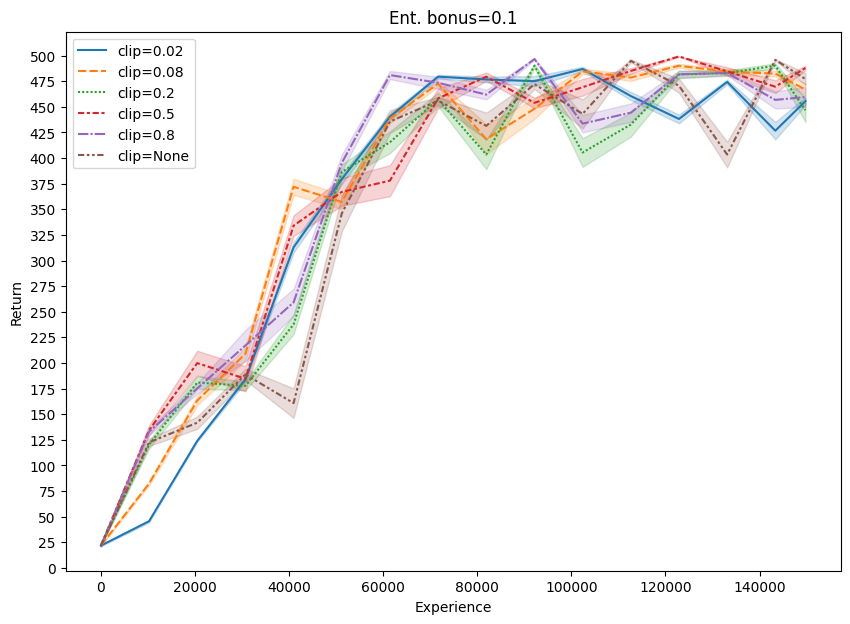

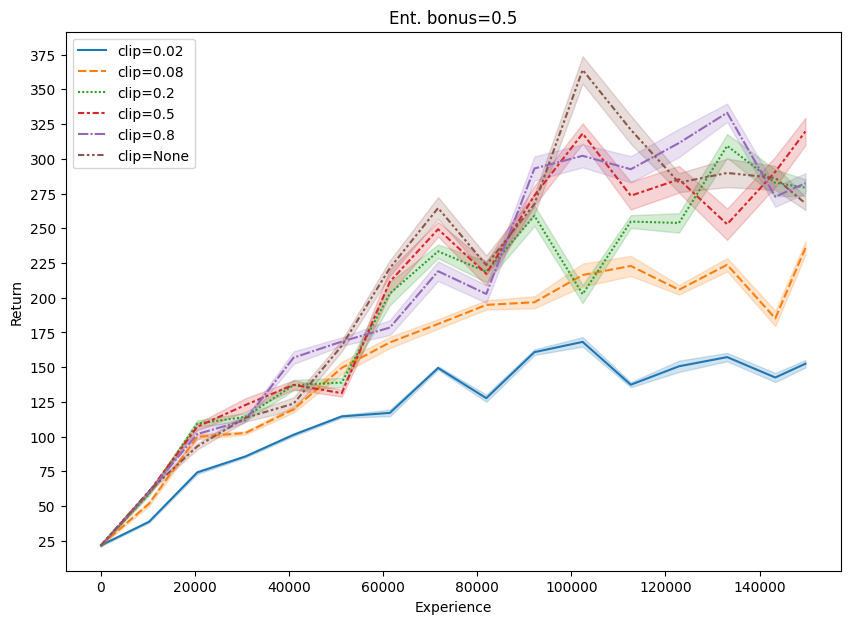

In [3]:
ents = [0.0, 0.01, 0.1, 0.5]
clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

returns = plot_returns("CartPole-v1", ents, clips)

In [ ]:
ents = [0.0, 0.01, 0.1, 0.5]
clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

returns = plot_returns("Acrobot-v1", ents, clips)